In [ ]:
from IPython.display import Image

In [1]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'true'
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from ultralytics import YOLO, settings
settings.update({'datasets_dir': os.path.abspath(os.path.join('..', 'data'))})

import sys
import importlib
importlib.reload(sys.modules['ultralytics'])
from ultralytics import YOLO

In [3]:
model = YOLO("yolo11n-obb.pt") # pre-trained on DOTAv1
model.info()

YOLO11n-obb summary: 196 layers, 2,664,432 parameters, 0 gradients, 6.7 GFLOPs


(196, 2664432, 0, 6.7032192)

In [4]:
# model = YOLO('../data/augmented_obb/runs/no_perspective3/weights/last.pt')
results = model.train(
    data="../data/augmented_obb/data.yaml",
    project='../data/augmented_obb/runs', name='no_perspective', save_dir='',
    device="mps",
    # resume=True,
    epochs=100,
    hsv_h=0.015, # hue, good for outdoor scenarious where lighting conditions change dramatically
    hsv_s=0.7, # saturation, good for varied weather conditions and camera settings
    hsv_v=0.4, # brighness, good for lighting conditions
    degrees=0.0, # rotation, already handled separately
    translate=0.1, # translation, already handled separately but we add some more to not make the model overfit 
    scale=0.5, # scale, already handled separately but we add some more to not make the model overfit
    shear=0.0, # shear, good for handling slight tilts/changes in perspective
    perspective=0.0, # perspective, good for handling perspective distortion
    flipud=0.0, # flip up down
    fliplr=0.5, # flip left right
    bgr=0.1, # BGR channel swap, robustness to camera settings
    mosaic=1.0, # mosaic augmentation, helps generalize to different sizes, partial occlusions, contexts, and multiple objects
    mixup=0.0, # mixup augmentation, helps reduce overfitting by blending images
    copy_paste=0.0, # only for segmentation
    erasing=0.0, # only for classification
    auto_augment=None, # only for classification
)

New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
engine/trainer: task=obb, mode=train, model=../data/augmented_obb/runs/no_perspective3/weights/last.pt, data=../data/augmented_obb/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=mps, workers=0, project=../data/augmented_obb/runs, name=no_perspective3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=../data/augmented_obb/runs/no_perspective3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

train: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/labels/train.cache... 1060 images, 0 backgrounds, 7 corrupt: 100%|██████████| 1060/1060 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/train/DigitalDiscovery_jpg_1.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0112871]
train: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/train/XCM-307A_Bottom_jpg_2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.031271]
train: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/train/Zedboard_jpg_4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.022782]
train: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/train/pcb123rec1_jpg_4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.076339]
train: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/train/pcb126rec1_jpg_2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.032584]
train


/Users/alex/Desktop/CS/ML/PCB-Detection/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/Users/alex/Desktop/CS/ML/PCB-Detection/venv/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/labels/val.cache... 270 images, 0 backgrounds, 3 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]

val: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/val/Spartan6_Bottom_jpg_2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.025427]
val: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/val/pcb137rec1_jpg_0.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.060582  1.0208551]
val: WARNING ⚠️ /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/images/val/pcb164rec1_jpg_1.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.088943]


Plotting labels to ../data/augmented_obb/runs/no_perspective3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Resuming training ../data/augmented_obb/runs/no_perspective3/weights/last.pt from epoch 81 to 100 total epochs
Image sizes 1024 train, 1024 val
Using 0 dataloader workers
Logging results to ../data/augmented_obb/runs/no_perspective3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.5G     0.5007     0.4419       1.54         25       1024: 100%|██████████| 66/66 [03:22<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:24<00:00,  4.99s/it]

                   all        267        267      0.991          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G     0.4905     0.4433      1.513         27       1024: 100%|██████████| 66/66 [03:35<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.62s/it]

                   all        267        267      0.993      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.5G     0.4753      0.412      1.485         30       1024: 100%|██████████| 66/66 [03:35<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:43<00:00,  2.58s/it]

                   all        267        267      0.998          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.6G     0.4664     0.4218      1.502         23       1024: 100%|██████████| 66/66 [03:36<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:45<00:00,  2.65s/it]

                   all        267        267      0.999          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.8G     0.4724     0.4229      1.495         25       1024: 100%|██████████| 66/66 [03:46<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:45<00:00,  2.66s/it]

                   all        267        267      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.7G     0.4531     0.4064       1.44         26       1024: 100%|██████████| 66/66 [03:51<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.63s/it]

                   all        267        267      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.8G     0.4545     0.3947       1.45         27       1024: 100%|██████████| 66/66 [03:54<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.59s/it]

                   all        267        267          1      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        12G     0.4715      0.416      1.506         33       1024: 100%|██████████| 66/66 [03:56<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.62s/it]

                   all        267        267      0.999          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.9G     0.4494      0.398       1.45         34       1024: 100%|██████████| 66/66 [03:57<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:43<00:00,  2.57s/it]

                   all        267        267      0.996          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        12G     0.4459     0.3993      1.455         36       1024: 100%|██████████| 66/66 [03:56<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:46<00:00,  2.73s/it]

                   all        267        267      0.996      0.996      0.994      0.961


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.1G     0.3172     0.2687        1.2         13       1024: 100%|██████████| 66/66 [03:57<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:46<00:00,  2.74s/it]

                   all        267        267      0.999          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.3G     0.3138     0.2594      1.226         13       1024: 100%|██████████| 66/66 [03:54<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:46<00:00,  2.72s/it]

                   all        267        267      0.999          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.4G      0.313     0.2566      1.183         13       1024: 100%|██████████| 66/66 [03:52<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:45<00:00,  2.68s/it]

                   all        267        267      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.5G     0.3087     0.2545      1.201         13       1024: 100%|██████████| 66/66 [04:03<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:45<00:00,  2.68s/it]

                   all        267        267      0.996          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.5G     0.3003     0.2503      1.195         13       1024: 100%|██████████| 66/66 [04:21<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:45<00:00,  2.69s/it]

                   all        267        267      0.992      0.974      0.983      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.7G     0.2874     0.2407      1.172         13       1024: 100%|██████████| 66/66 [04:25<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.65s/it]

                   all        267        267          1          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.7G     0.2959     0.2446      1.183         12       1024: 100%|██████████| 66/66 [04:28<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.63s/it]


                   all        267        267          1          1      0.995      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.8G     0.2936     0.2447      1.167         13       1024: 100%|██████████| 66/66 [04:28<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.60s/it]


                   all        267        267          1          1      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.8G     0.2766     0.2324      1.131         13       1024: 100%|██████████| 66/66 [04:27<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:44<00:00,  2.60s/it]


                   all        267        267          1          1      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.9G     0.2814     0.2355      1.145         13       1024: 100%|██████████| 66/66 [04:30<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:43<00:00,  2.56s/it]


                   all        267        267      0.999          1      0.995       0.97

20 epochs completed in 1.600 hours.
Optimizer stripped from ../data/augmented_obb/runs/no_perspective3/weights/last.pt, 6.3MB
Optimizer stripped from ../data/augmented_obb/runs/no_perspective3/weights/best.pt, 6.3MB

Validating ../data/augmented_obb/runs/no_perspective3/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:25<00:00,  5.01s/it]


                   all        267        267          1          1      0.995       0.97
Speed: 3.2ms preprocess, 169.3ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to ../data/augmented_obb/runs/no_perspective3


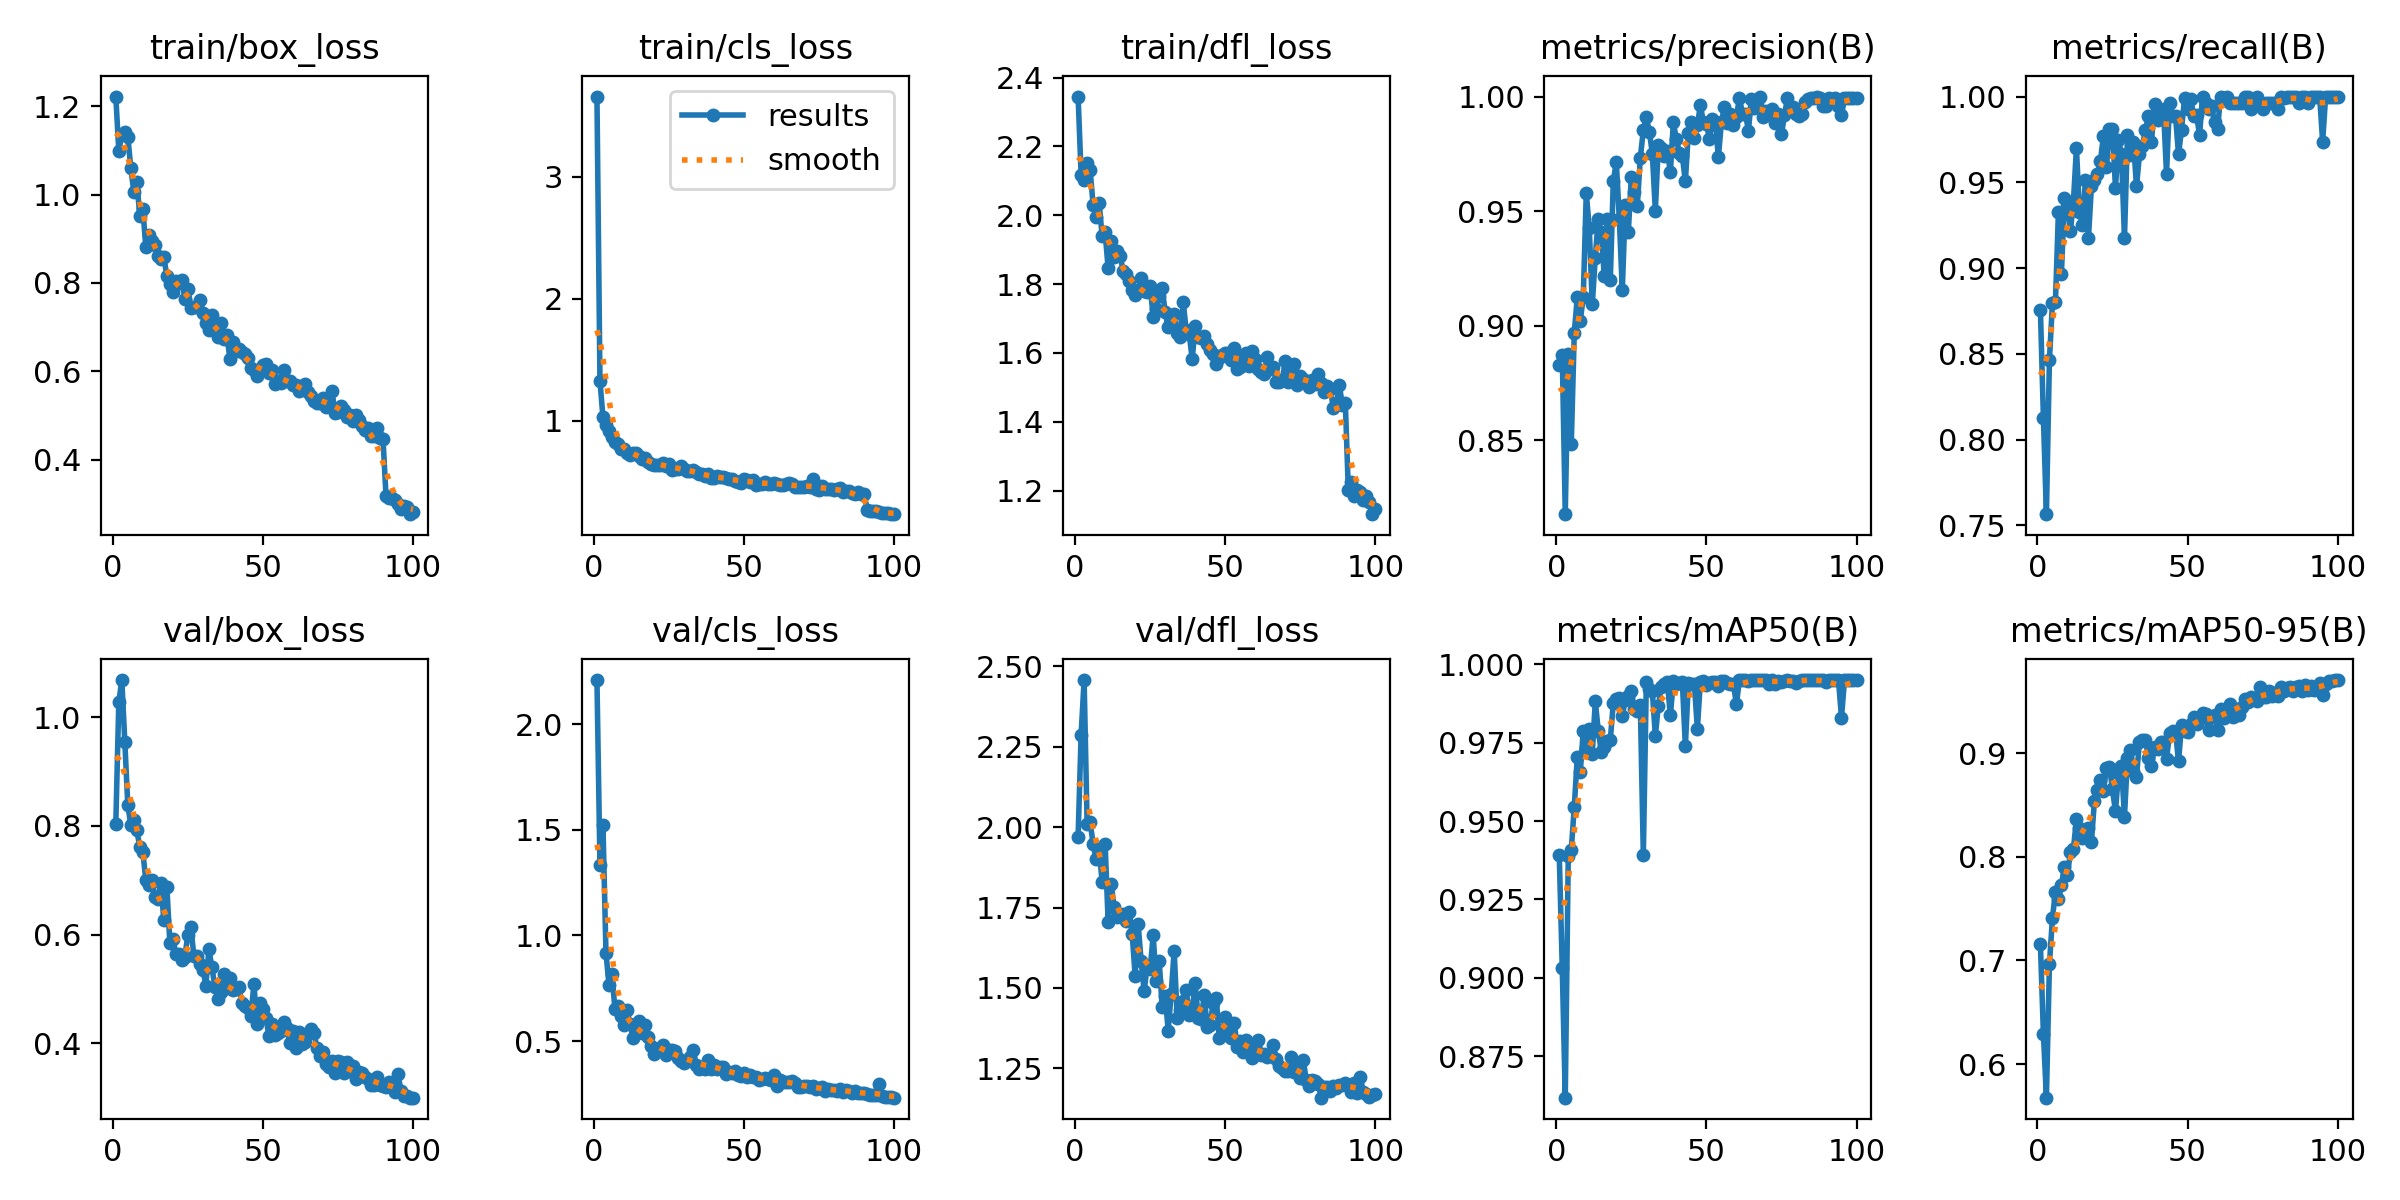

In [ ]:
Image(filename='../data/augmented_obb/runs/no_perspective3/results.png', width=800)

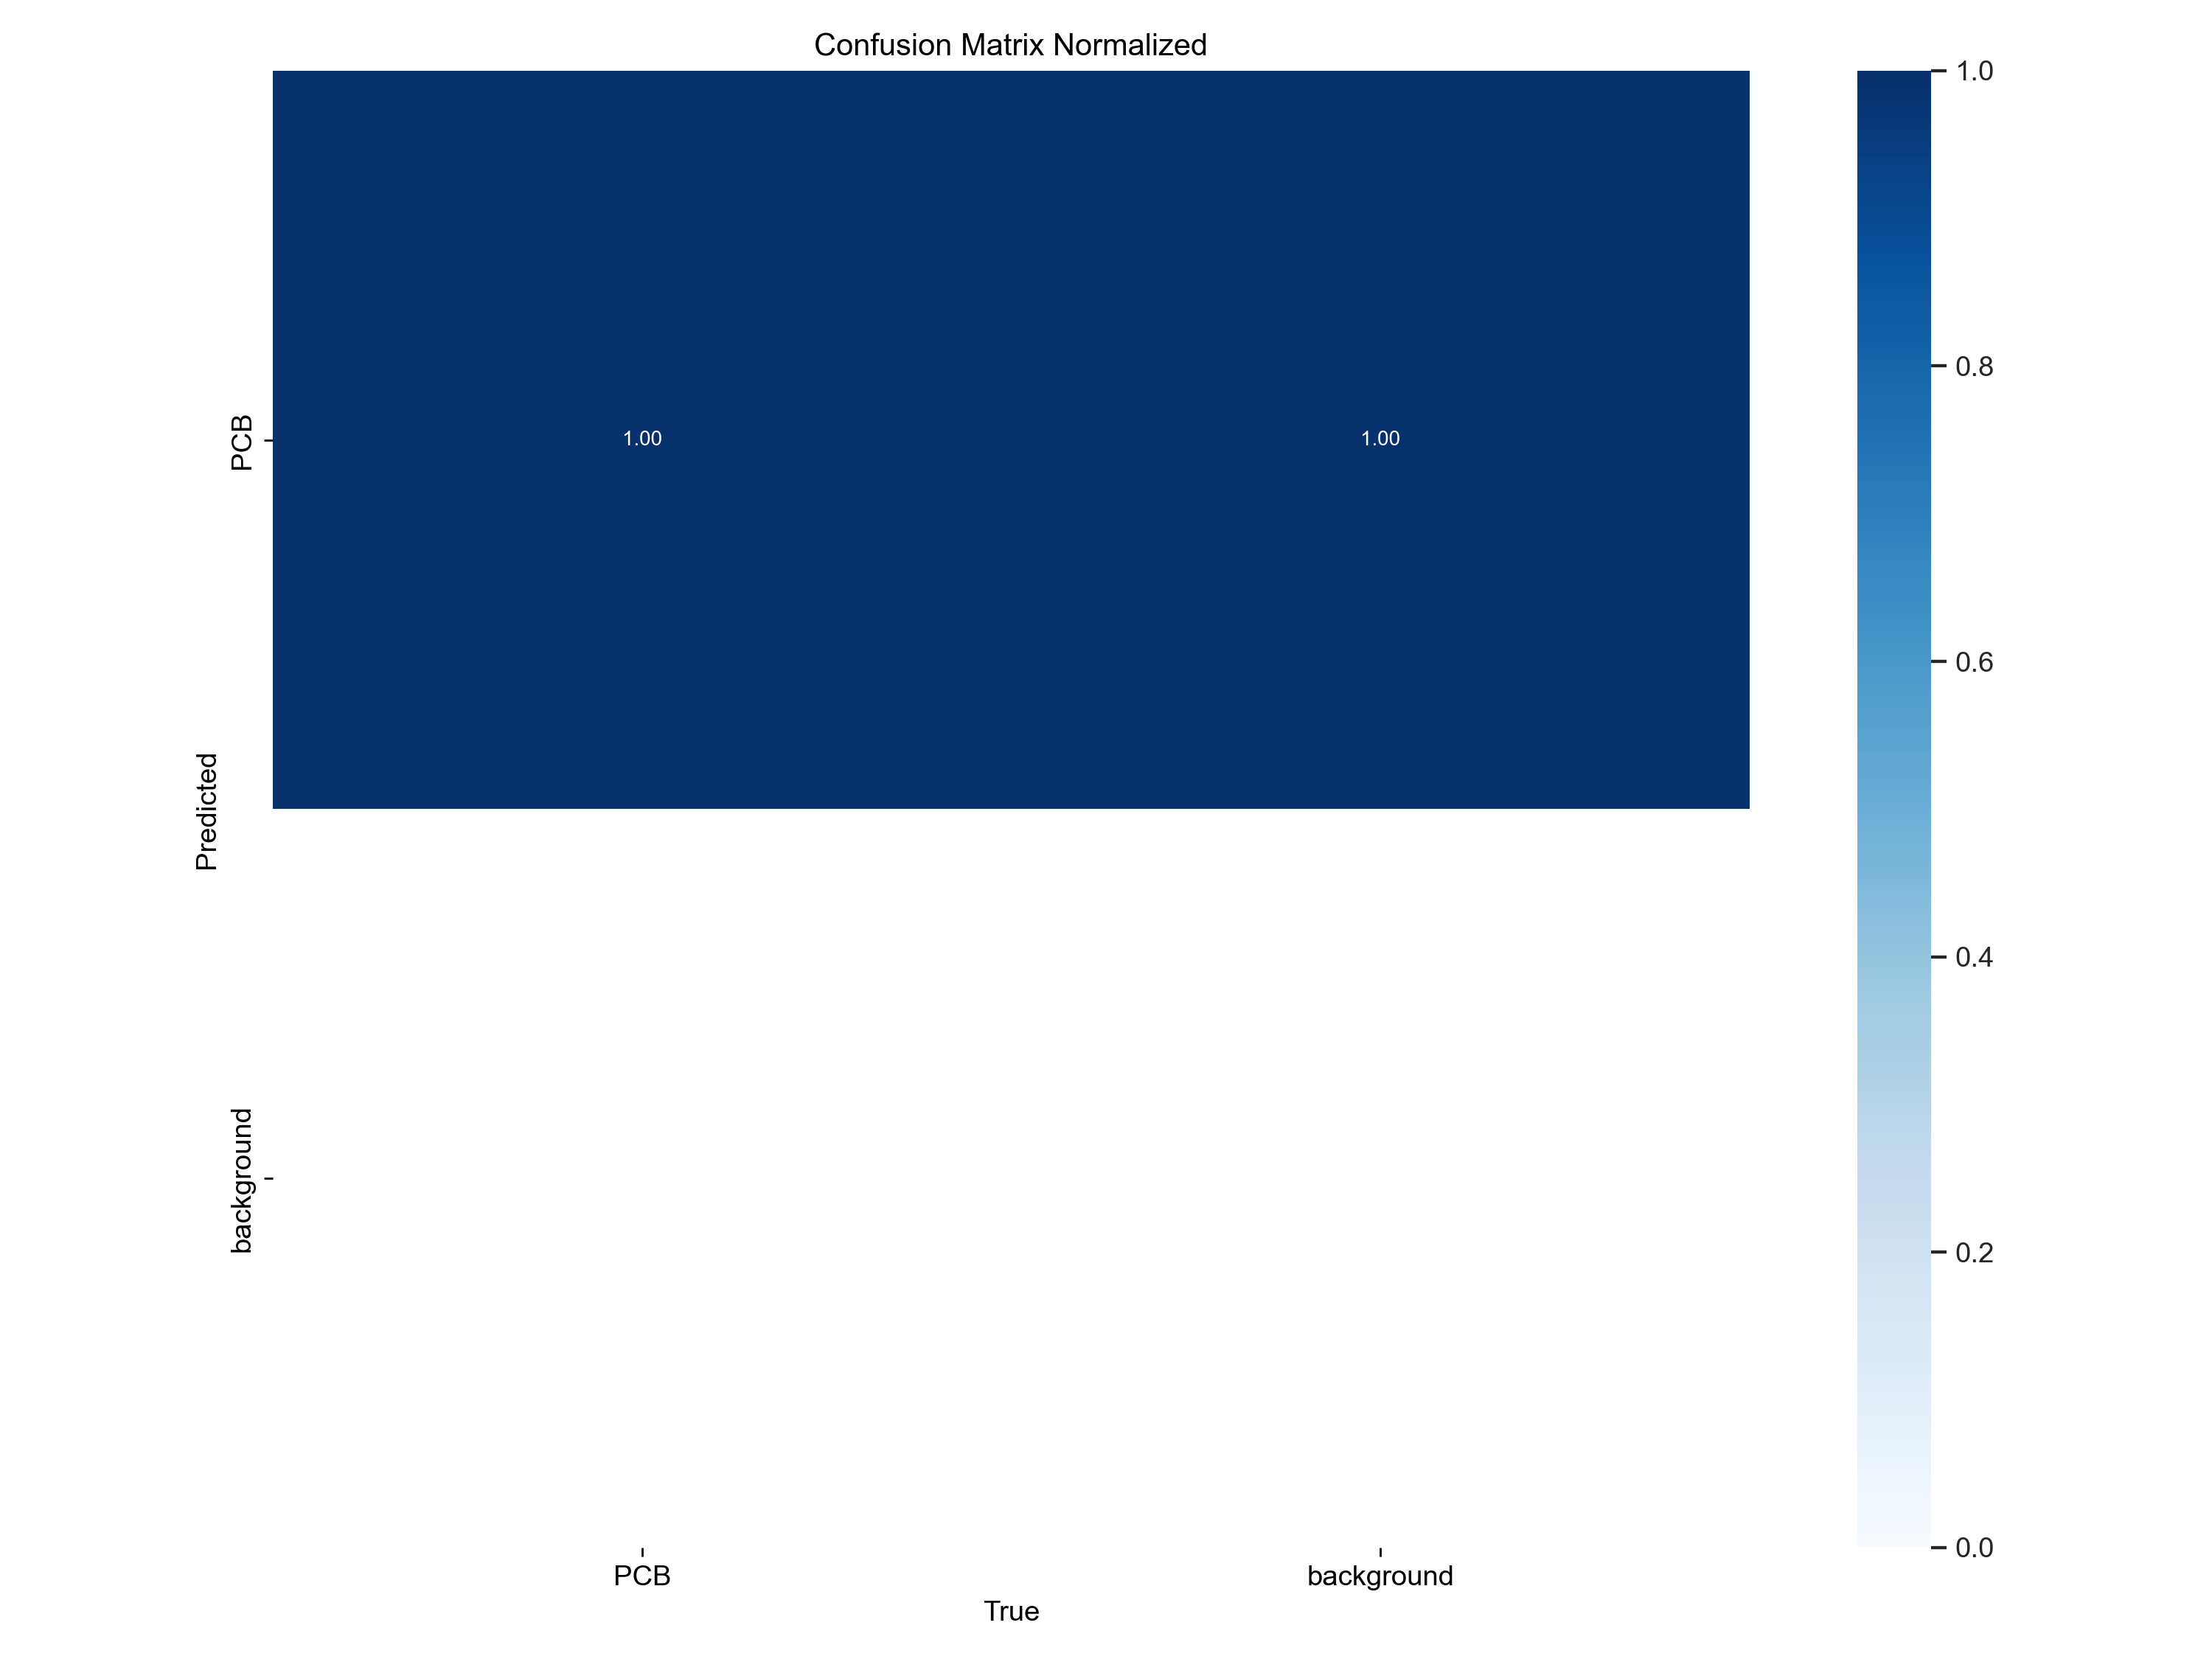

In [21]:
Image('../data/augmented_obb/runs/no_perspective3/confusion_matrix_normalized.png', width=600)

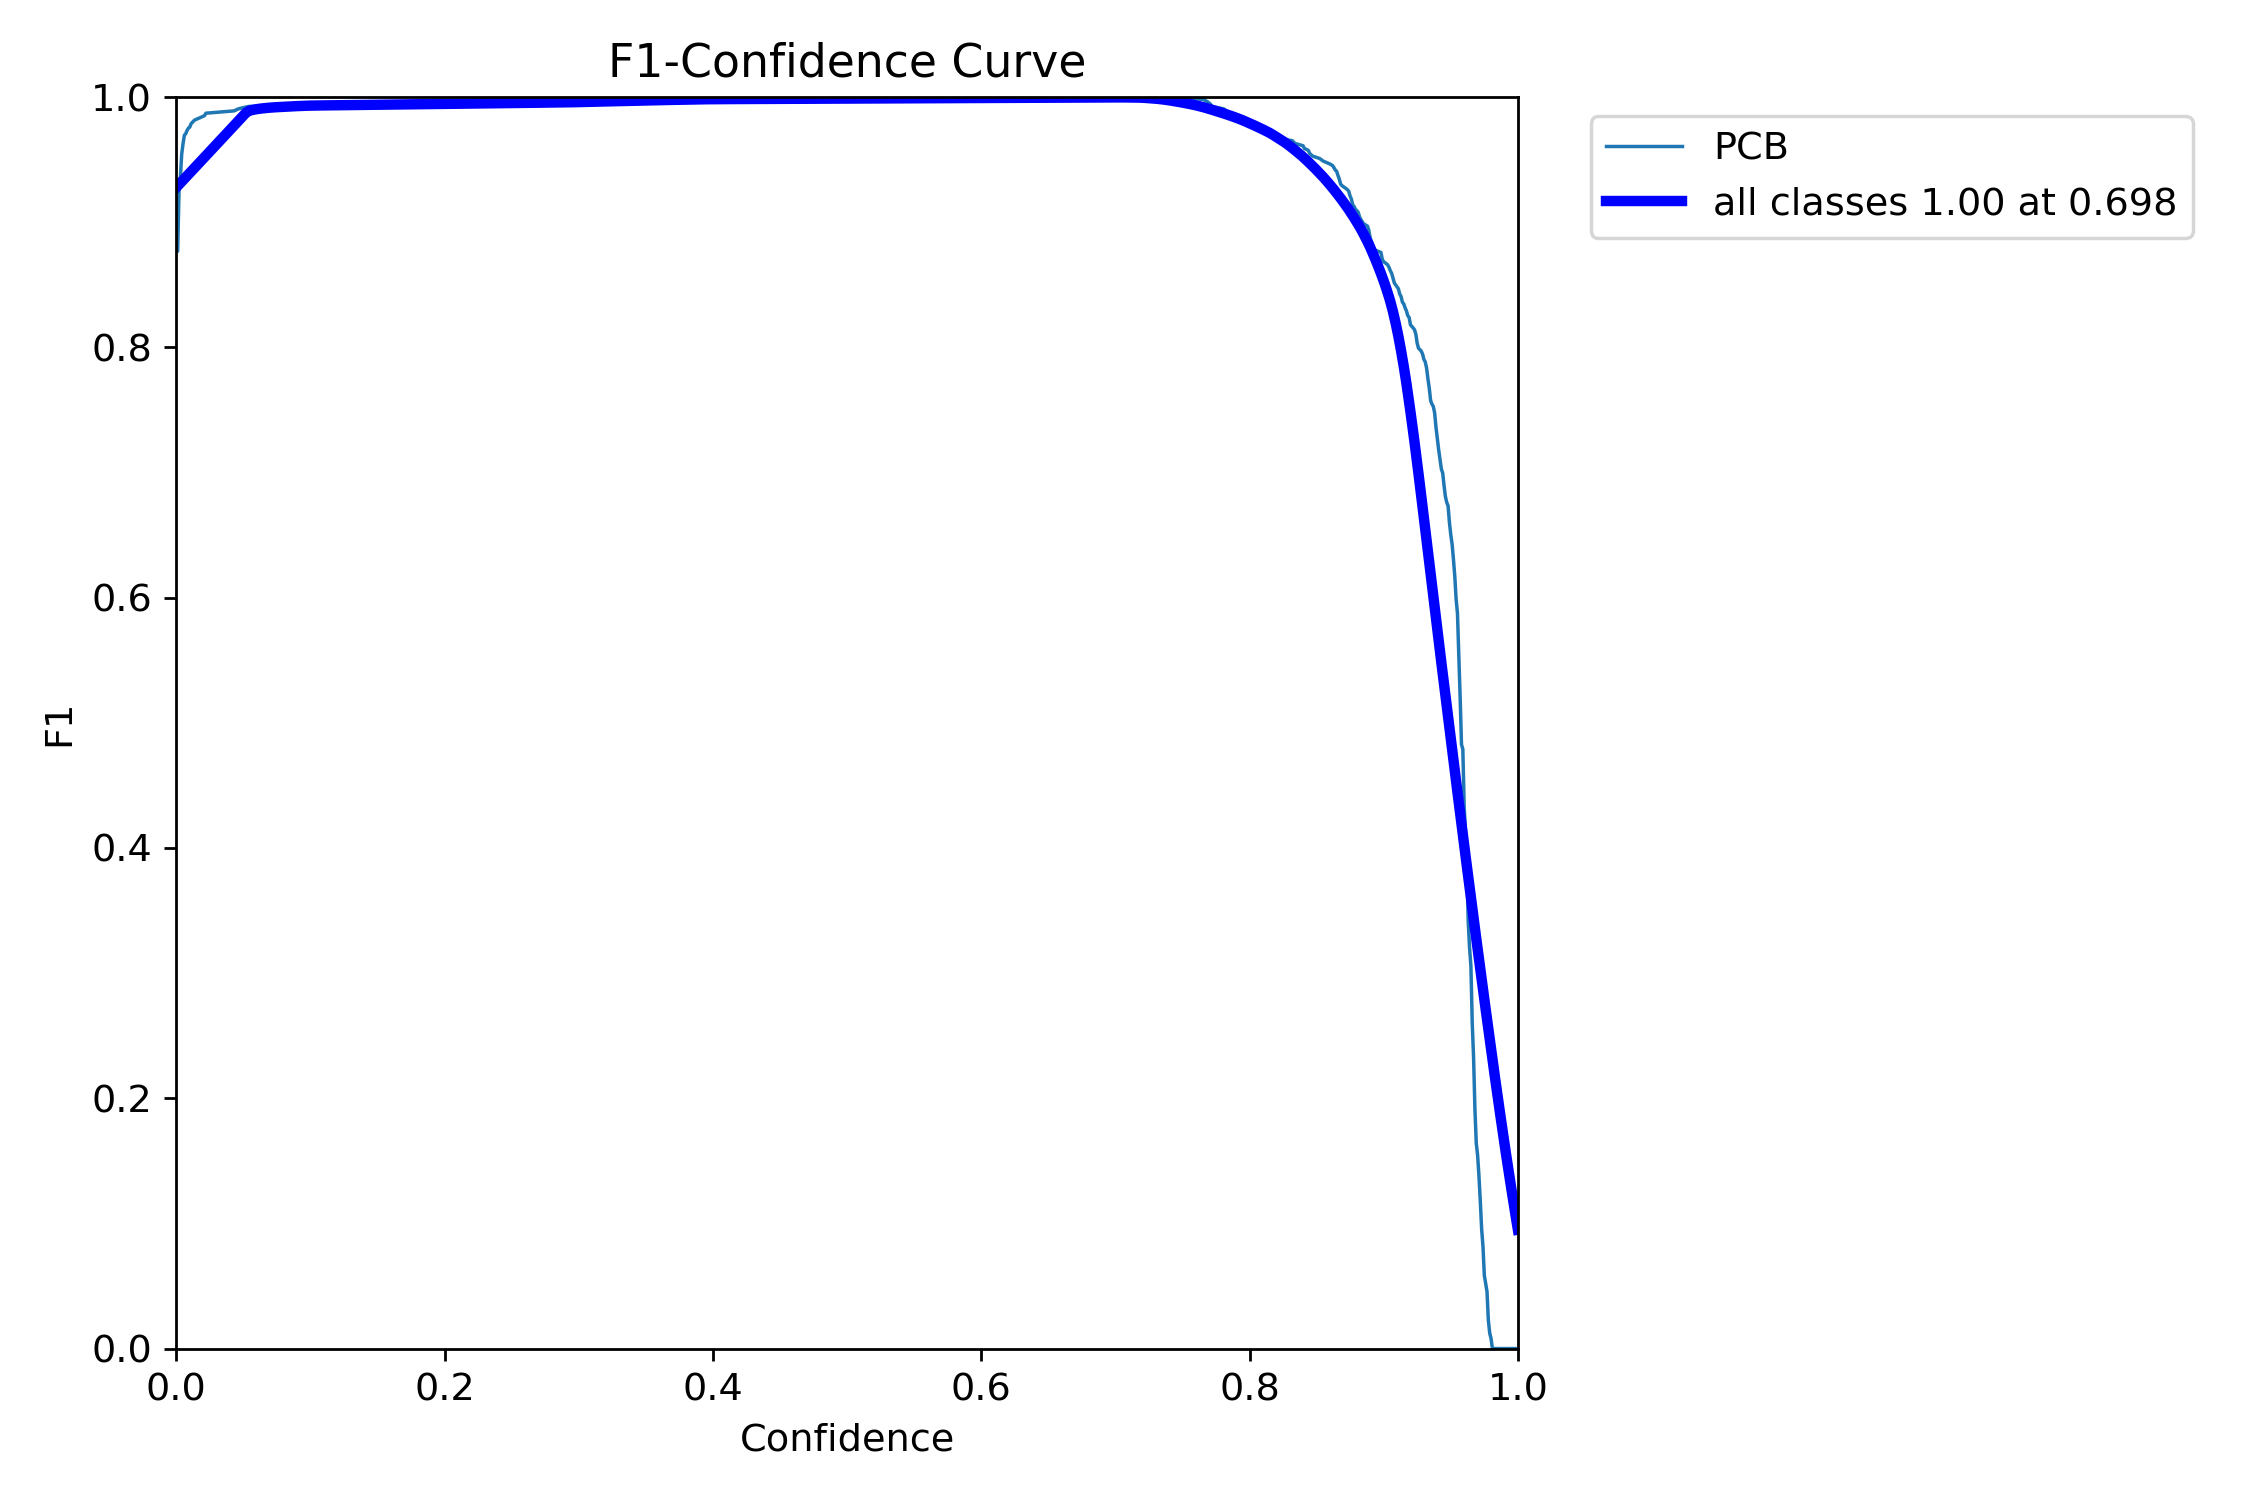

In [22]:
Image('../data/augmented_obb/runs/no_perspective3/F1_curve.png', width=600)

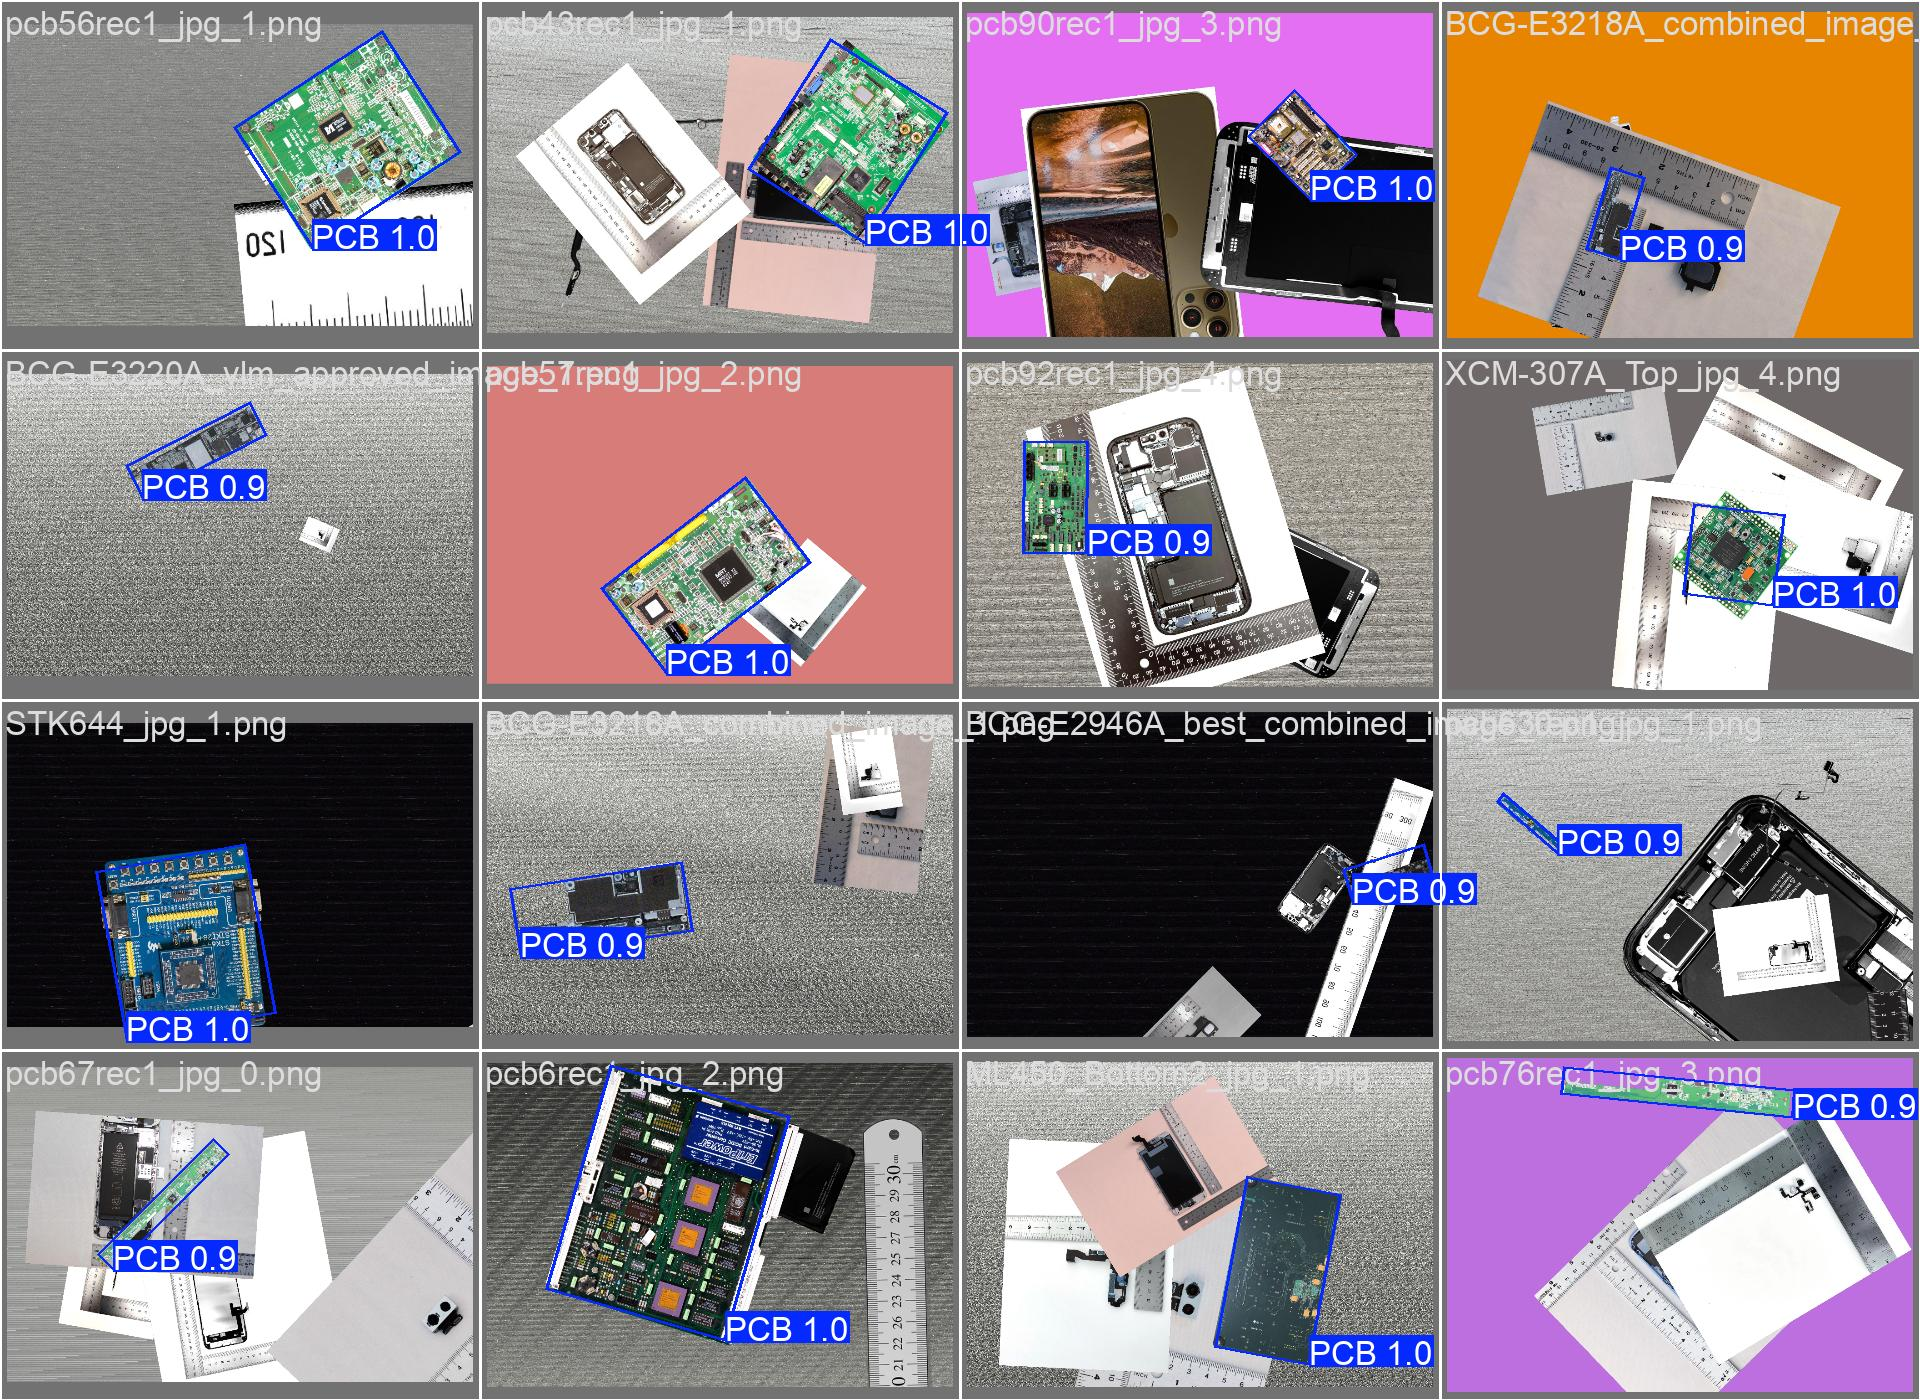

In [24]:
Image('../data/augmented_obb/runs/no_perspective3/val_batch1_pred.jpg', width=600)

In [ ]:
model = YOLO('../data/augmented_obb/runs/no_perspective3/weights/best.pt')
results = model.val(split='test', device='mps')

Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs


val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/labels/test.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]


                   all         35         35          1      0.884       0.93      0.912
Speed: 2.6ms preprocess, 8.3ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/obb/val3


In [28]:
model = YOLO('../data/augmented_obb/runs/no_perspective3/weights/epoch61_pr100.pt')
results = model.val(split='test', device='mps')

Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs


val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_obb/labels/test.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:06<00:13,  6.76s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


                   all         35         35       0.95      0.629       0.68      0.647
Speed: 3.1ms preprocess, 8.6ms inference, 0.0ms loss, 219.1ms postprocess per image
Results saved to runs/obb/val4
